**Importing the Dependencies**

In [75]:
# Importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, learning_curve
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



**Data Collection & Analysis**

In [10]:
# Data Collection & Analysis
# Loading the data from a CSV file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')


In [12]:

# Printing the first 5 rows of the dataframe
print(parkinsons_data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [14]:
# Checking the shape of the dataset
print("Shape of dataset:", parkinsons_data.shape)


Shape of dataset: (195, 24)


In [16]:

# Getting information about the dataset
parkinsons_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [18]:

# Checking for missing values
print("Missing values in each column:\n", parkinsons_data.isnull().sum())


Missing values in each column:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [20]:

# Statistical summary of the dataset
print(parkinsons_data.describe())


       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

In [24]:

# Distribution of target variable
print("Value counts for 'status':\n", parkinsons_data['status'].value_counts())


Value counts for 'status':
 status
1    147
0     48
Name: count, dtype: int64


1  --> Parkinson's Positive

0 --> Healthy


**Data Pre-Processing**

Separating the features & Target

In [32]:
# Separating features (X) and target variable (Y)
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']


Splitting the data to training data & Test data

In [34]:

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Shape of X:", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X: (195, 22)
Shape of X_train: (156, 22)
Shape of X_test: (39, 22)


**Model Training**

Support Vector Machine Model

In [81]:
# Model Training
# Support Vector Machine (SVM) Model
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)


SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [43]:

# Model Evaluation
# Accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data:', training_data_accuracy)


Accuracy score of training data: 0.8717948717948718


In [45]:
# Accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)


Accuracy score of test data: 0.8717948717948718


In [49]:
# Cross-Validation
cv_scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.92307692 0.82051282 0.87179487 0.76923077 0.74358974]
Mean CV Accuracy: 0.8256410256410256


In [51]:

# Randomized Search for Feature Importance
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, Y_train)



RandomForestClassifier(random_state=2)

In [53]:
# Feature Importance Extraction
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)



Feature Importances:
              Feature  Importance
18           spread1    0.144081
21               PPE    0.121141
0        MDVP:Fo(Hz)    0.108504
19           spread2    0.065190
6           MDVP:PPQ    0.051894
20                D2    0.042262
2       MDVP:Flo(Hz)    0.039409
1       MDVP:Fhi(Hz)    0.037763
7         Jitter:DDP    0.036971
5           MDVP:RAP    0.034925
12          MDVP:APQ    0.033027
3     MDVP:Jitter(%)    0.032982
4   MDVP:Jitter(Abs)    0.031992
14               NHR    0.031872
11      Shimmer:APQ5    0.027193
16              RPDE    0.025482
9   MDVP:Shimmer(dB)    0.024376
13       Shimmer:DDA    0.023550
8       MDVP:Shimmer    0.023418
15               HNR    0.022786
17               DFA    0.021783
10      Shimmer:APQ3    0.019397


In [55]:
# Selecting top 10 features
top_features = feature_importances['Feature'].head(10).values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [57]:

# Train SVM with selected features
model_selected = svm.SVC(kernel='linear')
model_selected.fit(X_train_selected, Y_train)


SVC(kernel='linear')

In [59]:
# Accuracy score with selected features
X_train_pred_selected = model_selected.predict(X_train_selected)
training_data_accuracy_selected = accuracy_score(Y_train, X_train_pred_selected)
X_test_pred_selected = model_selected.predict(X_test_selected)
test_data_accuracy_selected = accuracy_score(Y_test, X_test_pred_selected)

print('Training Accuracy (Selected Features):', training_data_accuracy_selected)
print('Testing Accuracy (Selected Features):', test_data_accuracy_selected)


Training Accuracy (Selected Features): 0.8525641025641025
Testing Accuracy (Selected Features): 0.8717948717948718


In [61]:
# Underfitting and Overfitting Analysis
print("\n--- Underfitting and Overfitting Analysis ---")
print("Training Accuracy (Original Features):", training_data_accuracy)
print("Testing Accuracy (Original Features):", test_data_accuracy)

if abs(training_data_accuracy - test_data_accuracy) > 0.1:
    print("The model may be overfitting. Consider regularization or reducing complexity.")
elif training_data_accuracy < 0.7 and test_data_accuracy < 0.7:
    print("The model may be underfitting. Consider adding more features or using a more complex model.")
else:
    print("The model shows good generalization.")



--- Underfitting and Overfitting Analysis ---
Training Accuracy (Original Features): 0.8717948717948718
Testing Accuracy (Original Features): 0.8717948717948718
The model shows good generalization.


C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 199, in fi

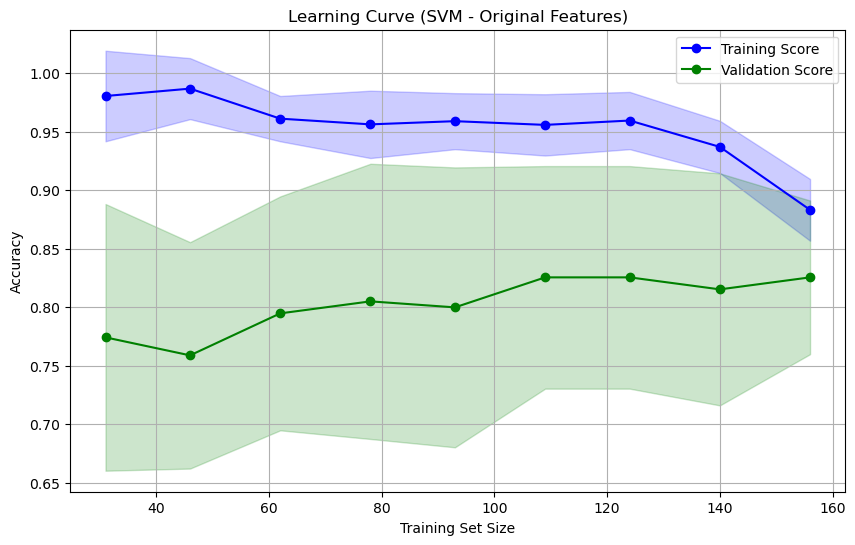

In [85]:
# Define the learning curve function as you already have it
def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, test_mean, label='Validation Score', color='green', marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curve for original features
plot_learning_curve(model, X, Y, "Learning Curve (SVM - Original Features)")


C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 199, in fi

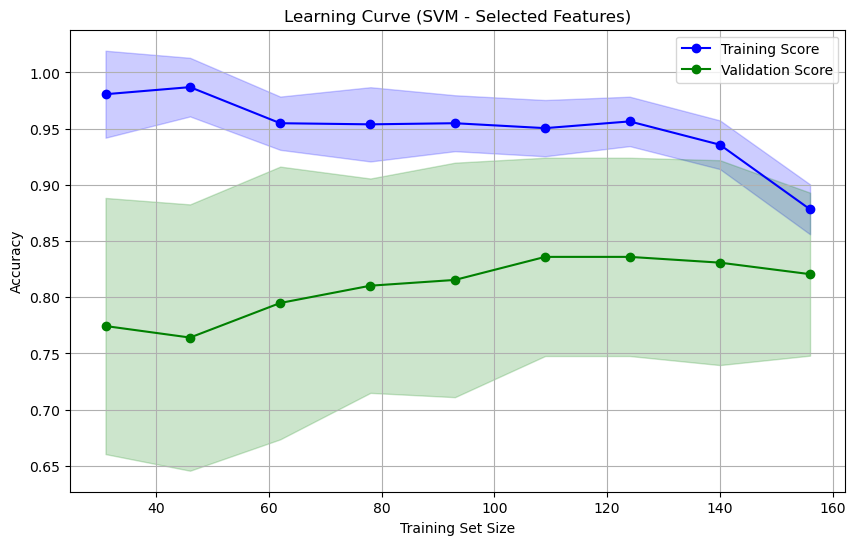

In [87]:

# Plot learning curve for selected features
plot_learning_curve(model_selected, X[top_features], Y, "Learning Curve (SVM - Selected Features)")

Building a Predictive System

In [89]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [91]:
import pickle

In [93]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [95]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [97]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
